<a href="https://www.kaggle.com/code/nikitarudakov/customer-personality-analysis?scriptVersionId=130817289" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install plotly

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.subplots as sp

import datetime


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

PATH = "/kaggle/input/customer-personality-analysis/marketing_campaign.csv"
pd.set_option('display.max_columns', None)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/customer-personality-analysis/marketing_campaign.csv


# Introduction

**Performing an effective customer personality analysis entails a crucial step of identifying and defining the problem that requires resolution. This is usually achieved by formulating a set of questions that will serve as the basis of the investigation.**

Key to the customer personality analysis is obtaining accurate and insightful responses to questions, such as:

1. What is the customer's perception of the company's products and services?
2. What are the critical factors that impact the customer's purchasing decisions?
3. How engaged is the customer with the company's products or services?

# Dataset Overview

**The purpose of this data overview is to provide a preliminary understanding of the dataset and the key variables that will be analyzed. The dataset contains information on customer attributes, products, promotions, and places, and will be used to perform a customer personality analysis.**

In [3]:
customers_data = pd.read_csv(PATH, sep="\t")
customers_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* The dataset consists of 2240 rows and 29 columns. 
* The dataset has no missing values in the columns except for the "Income" column, which has 24 missing values. 
* The "Education" and "Marital_Status" columns are of object type, suggesting that they contain categorical data. 
* Finally, the "Z_CostContact" and "Z_Revenue" columns appear to have constant values and may not be useful for further analysis.

In [5]:
# Customers Age might be more useful feature rather than the Year of birth 
customers_data["Age"] = datetime.datetime.now().year - customers_data.Year_Birth


# Define the age category bins
bins = list(range(0, 110, 10)) + [np.inf]

print(bins)

# Define the corresponding labels
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', 'Over 100']

# Customers Age Group
customers_data["Age_Group"] = pd.cut(customers_data.Age, bins, labels=labels)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, inf]


# Explanatory Analysis

In [6]:
customers_data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,54.194196
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000


**Understanding the distribution of the data is crucial for selecting the appropriate statistical metrics to explore and describe the data.**

By examining the distribution of the data, we can determine if it follows a normal distribution or if it is skewed. This information can be used to select the appropriate summary statistics and to identify any outliers or unusual data points.

## Customers Demographics

**Analyzing customer demographics is essential in customer personality analysis as it provides valuable insights into the characteristics, preferences, and behaviors of different customer segments.**

### Age Distribution

In [7]:
# Calculate the count of each category
cusomers_age_group = customers_data.Age_Group.value_counts().reset_index()

cusomers_age_group.columns = ["Age_Group", "Count"]
                                            
fig = px.bar(cusomers_age_group, x="Age_Group", y="Count")
fig.show()

The analysis reveals a substantial portion of customers falling within the age range of over 30 years. Moreover, the largest concentration is observed among customers aged over 40 but younger than 70. As a result, it would be prudent to prioritize the analysis and focus on these five age groups.

In [8]:
customers_age_ms_group = customers_data.groupby(["Age_Group", "Marital_Status"]).size()\
                                                                .reset_index(name="Count")

target_age_groups = ["31-40", "41-50", "51-60", "61-70", "71-80"]

fig = px.bar(customers_age_ms_group.loc[customers_age_ms_group.Age_Group.isin(target_age_groups), :], 
             x="Age_Group", y="Count", color="Marital_Status", barmode="group")

fig.show()

The analysis reveals a predominant presence of married individuals across all age cohorts. However, it is worth noting that a considerable portion of the population consists of individuals who are single or involved in non-marital relationships. Additionally, a smaller segment of the dataset comprises individuals who are divorced or widowed.

In [9]:
# Calculate the average values for each age group
avg_childrenhome = customers_data.groupby(["Age_Group"]).agg({"Kidhome":np.mean, "Teenhome":np.mean})\
                            .reset_index()


# Create the bar traces
def bar_avg_children(data, col, name):
    data_copy = data.copy().loc[data.Age_Group.isin(target_age_groups)]
    
    children_trace = go.Bar(
        x=data_copy.Age_Group,
        y=data_copy[f"{col}"],
        name=name
    )
    
    return children_trace
    
kidhome_trace = bar_avg_children(avg_childrenhome, "Kidhome", "Average Num Of Kids per Household") 
teenhome_trace = bar_avg_children(avg_childrenhome, "Teenhome", "Average Num Of Teens per Household") 

# Create the layout
layout = go.Layout(
    xaxis=dict(title='Age Group'),
    yaxis=dict(title='Average Number of Children')
)

# Create the figure
fig = go.Figure(data=[kidhome_trace, teenhome_trace], layout=layout)

# Show the figure
fig.show()

We can see vary natural observation, specifically, the older generation tends to have teenagers residing in their households, while individuals younger than 50 years are more likely to have children under the age of 13-14 living with them.

In [10]:
fig = px.histogram(customers_data.Age, marginal="box")
fig.show()

print(f"Skewness of Age Distribution is {customers_data.Age.skew()}")

Skewness of Age Distribution is 0.34994385918267057


**Central tendecy of customers age:**
* Median Age: 53 y.o
* Mean Age: 54 y.o (considering we have a few clear outliers when deriving age from the year of birth)

### Income Distribution

In [11]:
fig = px.histogram(customers_data.Income, marginal="box", nbins=100)
fig.update_layout(xaxis_range=[0, 120_000]) # there are a few outliers above 120K income
fig.show()

Based on the histogram and skewness measures, it appears that the data is relatively symmetric and not strongly skewed in any particular direction. But outliers should be taken in consideration when defining central tendency of income distribution.

There are only a few outliers that's why mean doesn't differ substantially from the median.

**Central tendecy of customers income:**
* Median Income: 51381.50 USD
* Mean Income: 52247.25 USD

#### Income Distribution by Education Category

**This section would focus on analyzing and understanding the distribution of income across various education levels within the dataset.**

In [12]:
fig = px.histogram(customers_data, x="Income", color="Education")
fig.update_layout(xaxis_range=[0, 120_000])
fig.show()

In [13]:
fig = px.histogram(customers_data, x="Income",
                   facet_col="Education")
fig.update_layout(xaxis_range=[0, 120_000], yaxis_range=[0,120])
fig.show()

The analysis indicates that there is a notable similarity in income distribution among individuals holding various graduate degrees, including Graduated, PhD, Master, and 2nd Cycle degrees. However, it is important to acknowledge that the representation of these educational levels differs. This discrepancy can be attributed to the inherent complexity associated with attaining higher degrees and educational accomplishments. 

### Enrollment Date Distribution

**The quantification of customers' engagement with a company can be significantly influenced by the number of years since their initial enrollment, rendering it a crucial metric for comprehensive analysis.**

In [14]:
# Convert "Dt_Customer" column to datetime format
customers_data['Dt_Customer'] = pd.to_datetime(customers_data['Dt_Customer'], dayfirst=True)

# Calculate today's date
today = pd.to_datetime('today')

# Calculate the duration in years since enrollment
customers_data['Enrollment_Duration_Years'] = ((today - customers_data['Dt_Customer']).dt.days // 365)

print("Min Enrollment Duration is {} (Years)".format(customers_data.Enrollment_Duration_Years.min()))
customers_data.loc[:, "Age":].head()

Min Enrollment Duration is 8 (Years)


,Age,Age_Group,Enrollment_Duration_Years
0,66,61-70,10
1,69,61-70,9
2,58,51-60,9
3,39,31-40,9
4,42,41-50,9


The dataset encompasses Customers with a minimum purchase history of 8 years or longer, demonstrating their enduring engagement with the company's products.

## Purchasing Behavior Analysis 
It is a crucial section in our comprehensive customer personality analysis. It involves identifying the top-selling position, gaining valuable insights into its success, and optimizing other product offerings. We carefully select appropriate statistical measures to accurately interpret the data and uncover key factors influencing customers' purchasing decisions.

In [15]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

product_names = ["Wines", "Fruit", "Meat Products", "Fist Products", "Sweet Products", "Gold Products"]

In [16]:
traces = [go.Histogram(x=customers_data[product_col], name=product_col) for i, product_col in enumerate(product_columns)]

fig = sp.make_subplots(rows=2, cols=3, 
                       subplot_titles=product_names)

trace_index = 0
for r in range(1, 3):
    for c in range(1, 4):
            fig.add_trace(traces[trace_index], row=r, col=c)
            trace_index=1
            
# Set the margins for the subplots
fig.update_layout(
    margin=dict(l=20, r=20, t=100, b=40),  # Set left, right, top, and bottom margins
    title="Product Purchases Distributions",
)
                       
fig.show()                       

Distribution plots indicate skewed to the right distributions of features. Thus, it is crucial to avoid assuming that a product (e.g., Wines) is the top-selling item based solely on individual customers who purchase more of it.  

In [17]:
melt_columns = {"variable": "Product Type", "value": "Meadian Purchases"}



total_num_of_purchased_products_per_category = pd.melt(customers_data.loc[:, product_columns])\
                                                .rename(melt_columns, axis=1)\
                                                .groupby("Product Type").median()\
                                                .sort_values(by="Meadian Purchases", ascending=False) 
                                                

fig = px.bar(total_num_of_purchased_products_per_category)
fig.show()

While it is evident that Wines Product holds the top-selling position, it is noteworthy that the median selling volume is considerably lower than the average **(173 median vs 303 mean)**. This serves as a crucial reminder to avoid overestimating the profitability of certain products.

In [18]:
top_selling_products = ["MntWines", "MntMeatProducts", "MntGoldProds", "MntFishProducts"]

###  Product vs Product

Within this section, we will explore the correlation between different products to determine if the purchase of one item influences the purchase of others.

<AxesSubplot: >

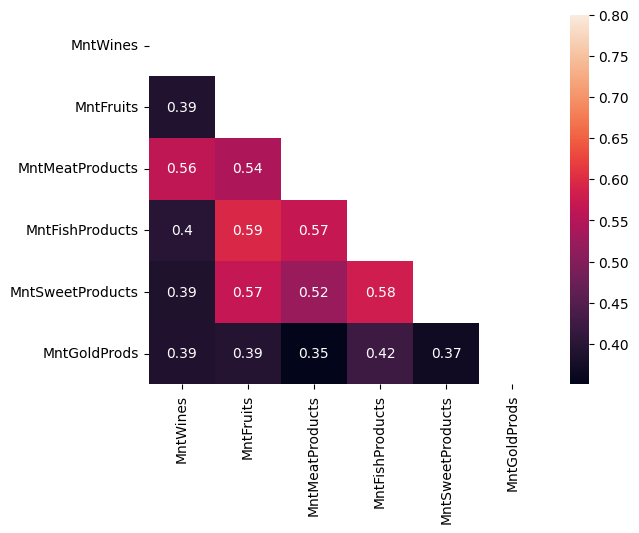

In [19]:
def correlation_triangle_heatmap(data):
    corrmat = data.corr()
    mask = np.triu(np.ones_like(data.corr(), dtype=bool))
    heatmap = sns.heatmap(corrmat, vmax=.8, annot=True ,mask=mask)
    return heatmap

correlation_triangle_heatmap(customers_data.loc[:, product_columns])

Purchases of all products categories are moderately correlated with each other. Some pairs such as Fruits and Fish or Fish and Sweet or Fruits and Sweet, etc are more correlated than others. This observation can be important in following analysis.

###  Demographics vs Product

Within this section, we will explore the correlation between different products and Income to determine if income influences the purchase of certain goods.

<AxesSubplot: >

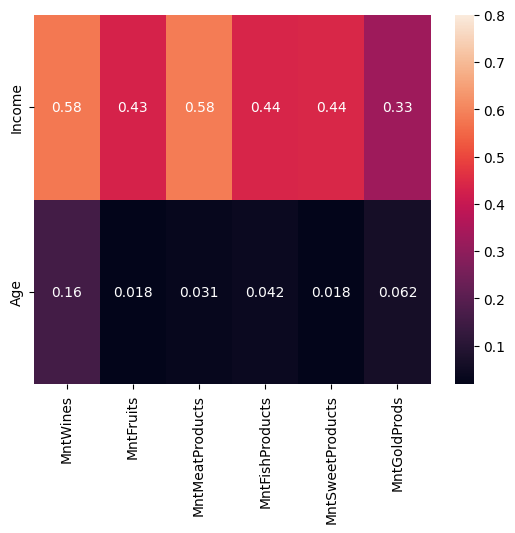

In [20]:
def correlation_with_products_heatmap(source_data, columns):
    columns_to_load = product_columns + columns

    data = source_data.copy().loc[:, columns_to_load]
    
    corrmat = data.corr().sort_values(by=columns, ascending=False)
    
    corrmat.drop(columns, axis=1, inplace=True)
    corrmat.drop(data.columns[:-len(columns)], inplace=True)
    
    heatmap = sns.heatmap(corrmat, vmax=.8, annot=True)
    return heatmap

correlation_with_products_heatmap(customers_data, columns=["Income", "Age"])

1. The moderate correlation between income and products suggests that income level has a notable influence on product preferences. Customers with higher incomes may be more likely to purchase certain products compared to those with lower incomes
2. The low correlation between age and products implies that age alone may not be a strong predictor of product preferences in your dataset. However, it doesn't necessarily mean that age is entirely irrelevant. It's essential to consider age in conjunction with other variables to gain a more comprehensive understanding of customer behavior.

In [21]:
def get_product_props_per_variable(col_name):
    products_education_data = customers_data.copy().loc[:, product_columns+[col_name]]
    products_education_data_melted = products_education_data.melt(id_vars=col_name, var_name="Product", value_name="Sum")\
                                                                  .groupby([col_name, "Product"]).sum()

    pivot_table = products_education_data_melted.unstack(level=0)
    pivot_table["Total"] = pivot_table.sum(axis=1)
    pivot_table = pivot_table.div(pivot_table['Total'], axis=0)
    pivot_table.drop("Total", axis=1, inplace=True)
    
    return pivot_table.loc[:, "Sum"]

In [22]:
df_education = get_product_props_per_variable("Education")
    
fig = px.bar(df_education, barmode='stack')
fig.show()

In [23]:
df_education = get_product_props_per_variable("Marital_Status")
    
fig = px.bar(df_education, barmode='stack')
fig.show()

There is a moderate correlation observed between income and purchases of Meat Products as well as Wines. This suggests that income may have an influence on the number of purchases in these two product categories.